In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.datasets import make_regression

In [2]:
# config device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)
y = y.reshape(-1,1)

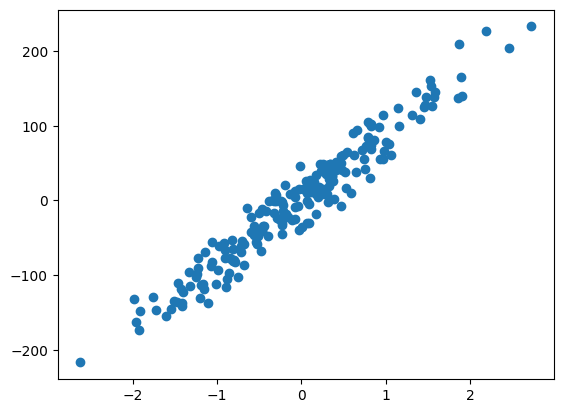

In [4]:
plt.scatter(X, y)

In [5]:
X = torch.as_tensor(X, dtype=torch.float, device=device)
y = torch.as_tensor(y, dtype=torch.float, device=device)

In [6]:
# preparing dataset and random split
dataset = TensorDataset(X, y)

num_train = int(len(dataset) * 0.75)
num_val = len(dataset) - num_train
train_data, val_data = random_split(dataset, [num_train, num_val])


In [7]:
# creating dataloader from train and val data
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16)

In [8]:
class LinearModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc = nn.Linear(1,1)

  def forward(self, X):
    return self.fc(X)


In [14]:
model = LinearModel()
model = model.to(device)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [10]:
def training_function(model, loss_fn, optimizer):

  def perform_train(X, y):

    pred = model(X)

    loss = loss_fn(pred, y)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    return loss.item()

  return perform_train


def validation_function(model, loss):

  def perform_validation(X, y):
    model.eval()

    pred = model(X)

    loss = loss_fn(pred, y)

    return loss.item()

  return perform_validation


def mini_batch(device, dataloader, step_fn):
  mini_batch_losses = []
  for x, y in dataloader:
    x = x.to(device)
    y = y.to(device)

    mini_bath_loss = step_fn(x,y)
    mini_batch_losses.append(mini_bath_loss)
  return np.mean(mini_batch_losses)




In [11]:
training_step = training_function(model, loss_fn, optimizer)
validation_step = validation_function(model, loss_fn)

In [12]:
losses = []
val_losses = []

for _ in range(300):
  loss = mini_batch(device, train_loader, training_step)
  losses.append(loss)


